In [1]:
import numpy as np

In [2]:
rnd = np.random
rnd.seed(0)

In [3]:
n = 5 #liczba klientow
Q = 20 #pojemnosc pojazdow
N = [i for i in range(1, n+1)] #indeksy klinetow
V = [0] + N # indeksy wszystkich obiektow
q = {i: rnd.randint(1, 10) for i in N} #zapotrzebowanie klientow

In [4]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [5]:
import matplotlib.pyplot as plt

(70.88609134840303, 198.53476451695838, 2.8308029193148236, 96.83246672973996)

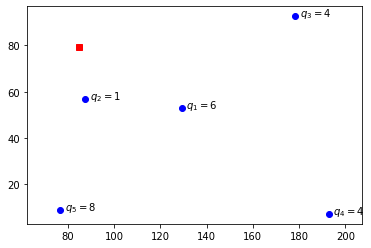

In [6]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [7]:
A = [(i, j) for i in V for j in V if i != j] #zestawienie łuków
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}#koszt przejazdu

In [18]:
print(A)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4)]


In [19]:
print(c)

{(0, 1): 51.63728511124141, (0, 2): 22.540941460809307, (0, 3): 94.5759064155537, (0, 4): 129.8394007303353, (0, 5): 70.91710557145935, (1, 0): 51.63728511124141, (1, 2): 41.84492272352712, (1, 3): 63.18211481021286, (1, 4): 78.32894677407201, (1, 5): 68.6062912533854, (2, 0): 22.540941460809307, (2, 1): 41.84492272352712, (2, 3): 97.62081814421155, (2, 4): 116.36319804717637, (2, 5): 49.29569075264127, (3, 0): 94.5759064155537, (3, 1): 63.18211481021286, (3, 2): 97.62081814421155, (3, 4): 86.65715984624178, (3, 5): 131.78129837255503, (4, 0): 129.8394007303353, (4, 1): 78.32894677407201, (4, 2): 116.36319804717637, (4, 3): 86.65715984624178, (4, 5): 116.05540700832415, (5, 0): 70.91710557145935, (5, 1): 68.6062912533854, (5, 2): 49.29569075264127, (5, 3): 131.78129837255503, (5, 4): 116.05540700832415}


In [9]:
from docplex.mp.model import Model

In [10]:
mdl = Model('CVRP')

In [11]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [12]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 20.1.0.0 | 2020-11-11 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 739.021279 after 0.00 sec. (0.00 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 5 rows and 0 columns.
MIP Presolve modified 10 coefficients.
Aggregator did 10 substitutions.
Reduced MIP has 20 rows, 45 columns, and 80 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 20 indicators.
Presolve time = 0.02 sec. (0.09 ticks)
Probing time = 0.00 sec. (0.04 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 20 rows, 45 columns, and 80 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 20 indicators.
Presolve time = 0.02 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.04 ticks)
Clique table members: 20.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solutio

In [13]:
print(solution)

solution for: CVRP
objective: 453.953
x_0_1=1
x_0_2=1
x_1_4=1
x_2_5=1
x_3_0=1
x_4_3=1
x_5_0=1
u_1=6.000
u_2=1.000
u_3=14.000
u_4=10.000
u_5=9.000



In [14]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [15]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(70.88609134840303, 198.53476451695838, 2.8308029193148236, 96.83246672973996)

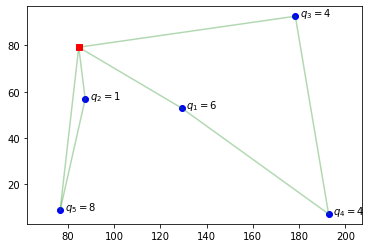

In [16]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')


In [17]:
#pip install CPLEX